### CONJUNTO DE DATOS SINTETICOS:
#### Creados como input para el trabajo de fin de master

**1. Bibliotecas y recursos:** Utilizados para la creación del dataset.

In [15]:
import geostatspy.GSLIB as GSLIB                          # Utilidades GSLIB y funciones envueltas
import geostatspy.geostats as geostats                    # GSLIB convertido a Python
import os                                                 # Para configurar el directorio de trabajo
import numpy as np                                        # Biblioteca de funciones matemáticas
import pandas as pd                                       # Biblioteca para manipulación de marcos de datos
import matplotlib.pyplot as plt                           # Biblioteca para salida gráfica
import scipy.stats                                        # Biblioteca de resumenes estadísticos y matemáticos
plt.style.use('seaborn')                                   # Estilo alternativo de Matplotlib

In [16]:
os.chdir("C:/Users/Heber/Desktop/Tesis2019/Tesis_Python/GSLIB_FOLDER") # ruta de ejecutables de GSLIB

**2. Creación del dataset sintetico a través de simulación estocastica:** Algoritmo de la GSLIB

In [29]:
# Simulación estocástica 2D:
nx = 100; ny = 100; cell_size = 5                        # Número de celdas y tamaño de celdas de la grilla.
xmin = 0.0; ymin = 0.0;                                   # Coordenadas de origen de la grilla.
xmax = xmin + nx * cell_size; ymax = ymin + ny * cell_size # Extensión de la grilla.
seed = 74073                                              # Semilla para generación de números aleatorios en simulación est.   
seed_2 = 74073
range_max = 500; range_min = 200; azimuth = 0           # Rango del variograma 2D y azimut.
range_max_2 = 250; range_min_2 = 50; azimuth_2 = 5
mean = 4.5; stdev = 2                                  # Media y desviación estandar de la variable de interés
mean_2 = 8; stdev_2 = 3
vario = GSLIB.make_variogram(0.0,nst=1,it1=1,cc1=1.0,azi1=azimuth,hmaj1=range_max,hmin1=range_min) # Generación del variograma GSLIB.
vario_2 = GSLIB.make_variogram(0.0,nst=1,it1=1,cc1=1.0,azi1=azimuth_2,hmaj1=range_max_2,hmin1=range_min_2)
vmin = 0; vmax = 15; cmap = plt.cm.jet              # Color mínimo y máximo utilizado en el mapa de colores.

# Calcular una realización estocástica de la variable N° 1:

sim = GSLIB.sgsim_uncond(1,nx,ny,cell_size,seed,vario,'simulation') # 2d simulación incondicional
sim = GSLIB.affine(sim,mean,stdev)                        # Corregir la distribución a una media objetivo y desviación estándar.

# Calcular una realización estocástica de la variable N° 2:

sim_2 = GSLIB.sgsim_uncond(1,nx,ny,cell_size,seed_2,vario_2,'simulation_2') # 2d simulación incondicional
sim_2 = GSLIB.affine(sim_2,mean_2,stdev_2)   

# Extracción de muestras a partir de la simulación:

sampling_ncell = cell_size  # muestras cada "n" número de nodos de la grilla.

samples = GSLIB.regular_sample(sim,xmin,xmax,ymin,ymax,sampling_ncell,3.5,3.5,nx,ny,'Realization') #df contenedor de la primera variable

samples_2 = GSLIB.regular_sample(sim_2,xmin,xmax,ymin,ymax,sampling_ncell,3.5,3.5,nx,ny,'Realization_2') #df contenedor de la segunda variable

**3. Visualización de la simulación y muestras extraidas como dataset sintentico para el estudio:**

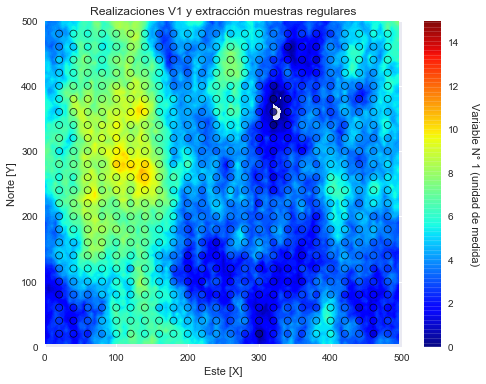

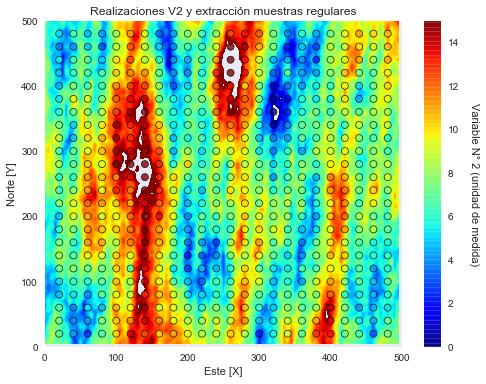

In [30]:
# Visualización de la simulación estocástica:

GSLIB.locpix(sim,xmin,xmax,ymin,ymax,cell_size,vmin,vmax,samples,'X','Y','Realization','Realizaciones V1 y extracción muestras regulares','Este [X]','Norte [Y]','Variable N° 1 (unidad de medida)',cmap,"var1_muestras")


GSLIB.locpix(sim_2,xmin,xmax,ymin,ymax,cell_size,vmin,vmax,samples_2,'X','Y','Realization_2','Realizaciones V2 y extracción muestras regulares','Este [X]','Norte [Y]','Variable N° 2 (unidad de medida)',cmap,"var2_muestras")


**4. Tratamiento y gráficos de los DataFrame correspondientes a las muestras extraidas:**

In [31]:
samples["V2"] = samples_2['Realization_2'] #Paso de V2 al df "samples", de esta forma las 2 variables estaran unidos en un df por X,Y

samples.rename(index=str, columns={"X": "Este [X]", "Y": "Norte [Y]", "Realization": "V1"}, inplace=True) #renombre de columnas df v1

print("Media V1:", round(samples["V1"].mean(),2), "Desviación Estandar V1:", round(np.sqrt(samples["V1"].var()),2)) #media y desviación estandar v1
print("Media V2:", round(samples["V2"].mean(),2), "Desviación Estandar V2:", round(np.sqrt(samples["V2"].var()),2)) #media y desviación estandar v2

Media V1: 4.53 Desviación Estandar V1: 2.05
Media V2: 8.05 Desviación Estandar V2: 3.07


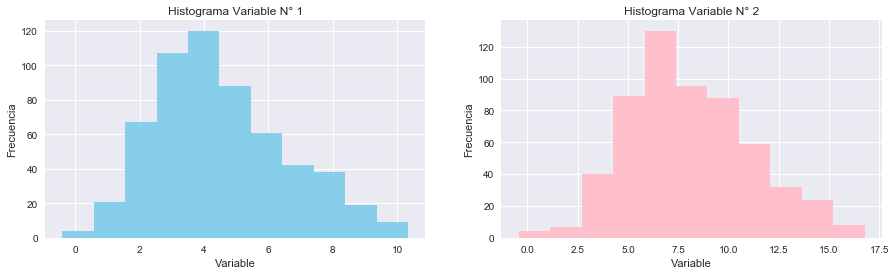

In [32]:
# Figura con 3 histogramas de la variable:

fig = plt.figure(figsize=(15, 4))
# fig.suptitle('HISTOGRAMAS DE LA VARIABLE [Z]')

plot1 = fig.add_subplot(121)
plt.hist(samples['V1'], bins="sturges",color='skyblue', histtype='stepfilled')
plt.grid(False)
plt.xlabel("Variable")
plt.ylabel("Frecuencia")
plt.title("Histograma Variable N° 1")
plt.grid(True)

plot3 = fig.add_subplot(122)
plt.hist(samples['V2'], bins="sturges",color='pink', histtype='stepfilled',cumulative=False)
plt.grid(True)
plt.xlabel("Variable")
plt.ylabel("Frecuencia")
plt.title("Histograma Variable N° 2")

plt.show()

In [33]:
x = samples["V1"]
y = samples["V2"]

#Calculando los coeficientes del ajuste de regresión:

a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio

r = np.corrcoef(x, y) # r = coeficiente de correlación

print("R:", r, "a:", a, "b:", b) # b: pendiente de la recta, a: ordenada en la vertical (Y = bX + a)

R: [[1.         0.74696153]
 [0.74696153 1.        ]] a: 1.1176364535341472 b: 2.9946938378723478


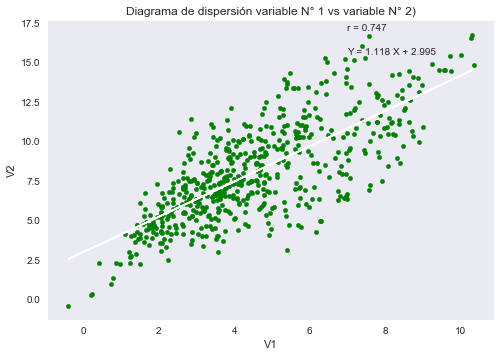

In [34]:
samples.plot(kind="scatter", x="V1", y="V2", color="green") #Diagrama de dispersión 2D
plt.plot(x, a * x + b, color="white")
plt.text(7,17, 'r = {0:2.3f}'.format(r[0,1]))
plt.grid(False)
plt.text(7,15.5, 'Y = {0:2.3f} X + {1:2.3f}'.format(a,b))
plt.title("Diagrama de dispersión variable N° 1 vs variable N° 2)")
plt.show()